In [1]:
# p269 LSTM, CNN의 조합을 이용한 영화 리뷰 분류하기
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

In [3]:
# 패딩
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [5]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [6]:
model.summary()

# 5000 x 100 = 500000
# 100 x 64 x 5 + 64 = 32064
# maxpooling 1차원이라 영향x
# ((64 + 55) x 55 + 55) x 4 = 26400
# (55) x 1 + 1 = 56
# dropout => 파라미터 영향 x

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                      

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss', patience=5)

In [8]:
history=model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 49s 100ms/step - loss: 0.4545 - accuracy: 0.7696 - val_loss: 0.3367 - val_accuracy: 0.8605
Epoch 2/100
469/469 [==============================] - 47s 101ms/step - loss: 0.3203 - accuracy: 0.8654 - val_loss: 0.3224 - val_accuracy: 0.8664
Epoch 3/100
469/469 [==============================] - 47s 101ms/step - loss: 0.2920 - accuracy: 0.8783 - val_loss: 0.3061 - val_accuracy: 0.8686
Epoch 4/100
469/469 [==============================] - 48s 102ms/step - loss: 0.2745 - accuracy: 0.8856 - val_loss: 0.3128 - val_accuracy: 0.8677
Epoch 5/100
469/469 [==============================] - 48s 103ms/step - loss: 0.2549 - accuracy: 0.8961 - val_loss: 0.2987 - val_accuracy: 0.8718
Epoch 6/100
469/469 [==============================] - 48s 103ms/step - loss: 0.2352 - accuracy: 0.9043 - val_loss: 0.3184 - val_accuracy: 0.8699
Epoch 7/100
469/469 [==============================] - 49s 104ms/step - loss: 0.2203 - accuracy: 0.9107 - val_loss: 0.3016 -

In [9]:
# LSTM 과 CNN을 섞어서쓰니 성능이 좋게나옴
print('TEST ACCURACY: %.4f' %(model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 16s 21ms/step - loss: 0.3396 - accuracy: 0.8675
TEST ACCURACY: 0.8675


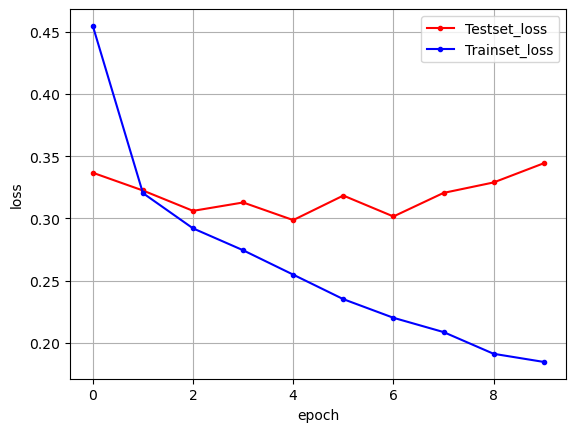

In [10]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()